# Problem 1

## Implement serial test and apply to a samples

In [5]:
import numpy as np
from scipy import stats

def rng(m = 2 ** 32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

arr = np.array(list(rng() for _ in range(1000)))
ser_arr = arr.reshape(-1, 2)

k = 20
hist = np.histogram2d(ser_arr[:, 0], ser_arr[:, 1], bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1)])[0]
obs = hist.flatten()
exp = np.full_like(obs, obs.sum() / (k ** 2))

print(stats.chisquare(obs, exp))

Power_divergenceResult(statistic=391.2, pvalue=0.6003664860752091)


# Problem 2

## implement permutation test and apply to a samples

In [10]:
from itertools import permutations
import numpy as np
from scipy import stats
import math

def rng(m = 2 ** 32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

def order_stat(d):
    sample = np.array(list(rng() for _ in range(500 * d)))
    perm_list = list(permutations(list(range(0, d))))
    obs = [0 for _ in range(math.factorial(d))]
    
    split_sample = np.split(sample, 500)
    
    for i in range(500):
        current_index = perm_list.index(tuple(np.argsort(split_sample[i])))
        obs[current_index] += 1
        
    exp = np.full(math.factorial(d), 500 / math.factorial(d))    
    print(stats.chisquare(obs, exp))
    
order_stat(6)

Power_divergenceResult(statistic=709.5999999999999, pvalue=0.5914869741733766)


# Problem 3

## Provide a statistical test to show that rng_bad has problems but rng_good does not

In [14]:
import numpy as np
from scipy import stats

def rng_bad(m = 2 ** 31, a = 65539, c = 0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

rng_bad.current = 1

arr = np.array(list(rng_bad() for _ in range(1000)))
ser_arr = arr.reshape(-1, 2)

k = 20
hist = np.histogram2d(ser_arr[:, 0], ser_arr[:, 1], bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1)])[0]
obs = hist.flatten()
exp = np.full_like(obs, obs.sum() / (k ** 2))

print(stats.chisquare(obs, exp))

Power_divergenceResult(statistic=456.79999999999995, pvalue=0.02395205738027778)


# Problem 4

## Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

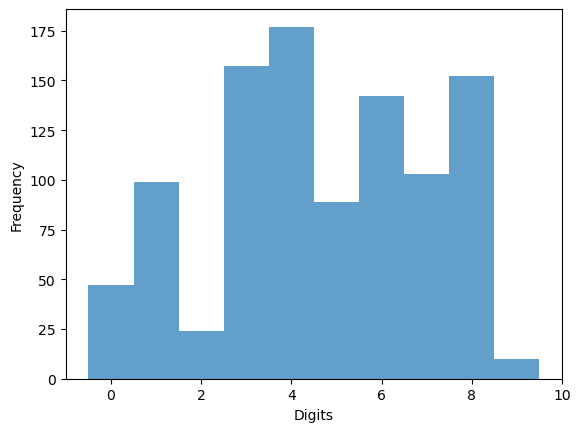

[0.04587996 0.10497393 0.02755739 0.13700808 0.17389043 0.10461636
 0.15198063 0.10949964 0.13345814 0.01113543]
[9 2 0 5 1 7 8 3 6 4]
1.0


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def rng(m = 2 ** 32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

#weights = np.random.dirichlet(np.ones(10)) # В примере указаные неправильные веса, так как их сумма не равна единице
future_weights = list(rng() for _ in range(10))
weights = np.array(future_weights) / sum(future_weights)
digits = np.arange(10)

sort_index = np.argsort(weights)

#np.random.seed(1) # Чтобы график не менялся при каждом запуске
sample = np.random.choice(digits[sort_index], size = 1000, p = weights[sort_index])

plt.hist(sample, bins = np.arange(-0.5, 10.5, 1), alpha = 0.7)

plt.ylabel("Frequency")
plt.xlabel("Digits")
plt.show()

print(weights)
print(digits[sort_index])
print(sum(weights))

# Problem 5

## Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

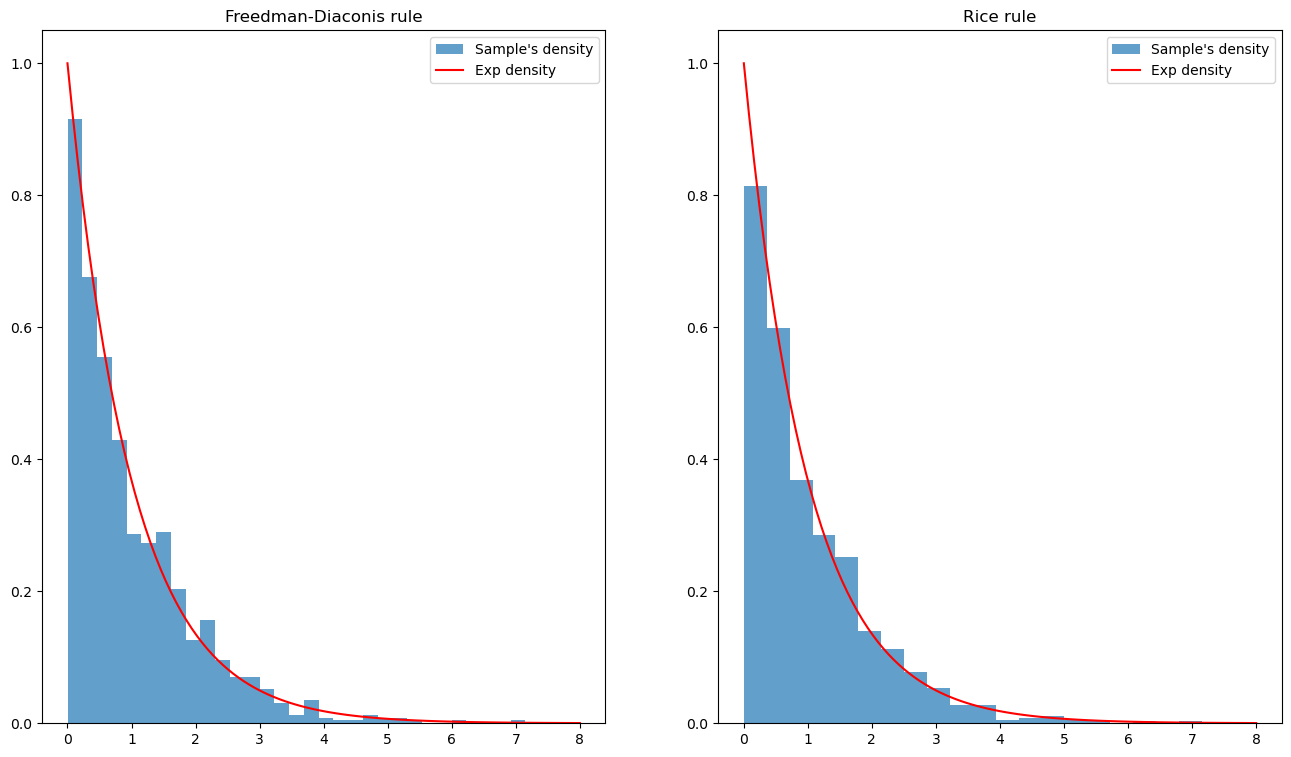

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def rng(m = 2 ** 32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

sample = np.array(list(rng() for _ in range(1000))) # Имеет равномерное распределение на отрезке [0, 1]

ex_sample = -np.log(1 - sample) # Будем считать, что lambda = 1

x = np.linspace(0, 8, 100)

plt.figure(figsize = (16, 9))

plt.subplot(121)
plt.hist(ex_sample, bins = np.histogram_bin_edges(ex_sample, bins = "fd"), alpha = 0.7, density = True, label = "Sample's density")
plt.plot(x, np.exp(-x), "r-", label = "Exp density")
plt.title("Freedman-Diaconis rule")
plt.legend(loc = "best")


plt.subplot(122)
plt.hist(ex_sample, bins = np.histogram_bin_edges(ex_sample, bins = "rice"), alpha = 0.7, density = True, label = "Sample's density")
plt.plot(x, np.exp(-x), "r-", label = "Exp density")
plt.title("Rice rule")
plt.legend(loc = "best")

plt.show()

# Problem 6

## Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

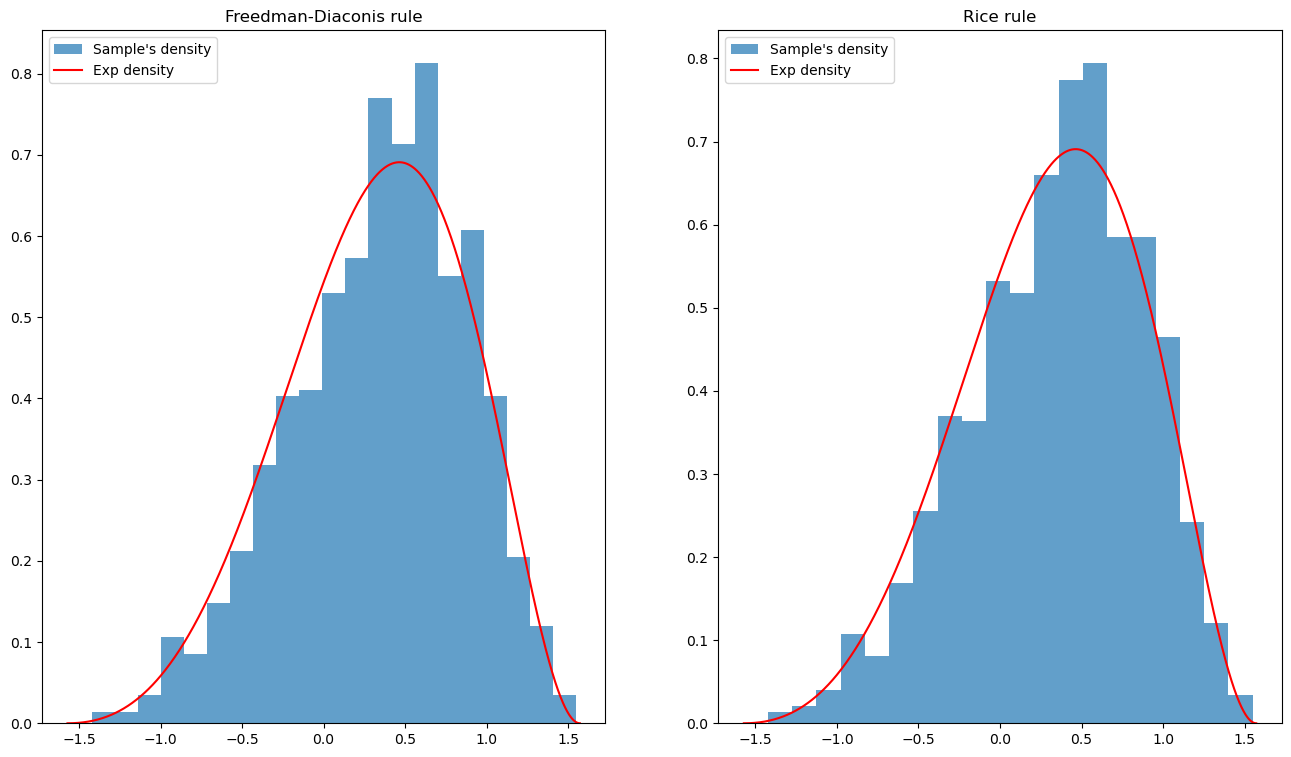

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random

def rng(m = 2 ** 32, a = 1103515245, c = 12345, seed = 1):
    rng.current = seed
    while True:
        rng.current = (a * rng.current + c) % m
        yield rng.current / m

def f(x):
    return (np.exp(x) * (np.cos(x) ** 2))

integral = quad(f, -np.pi / 2, np.pi / 2)[0]

def f_density(x):
    return f(x) / integral

counter = 0
sample = []
random_gen = rng()
while counter < 1000: # Можно поставить 10000, тогда будет еще точнее
    current = -np.pi / 2 + next(random_gen) * np.pi  # Переносим [0,1] -> [-π/2, π/2]
    if random.uniform(0, 10 / np.pi) <= f_density(current):
        sample.append(current) 
        counter += 1
        
plt.figure(figsize = (16, 9))

point = np.linspace(-np.pi / 2, np.pi / 2, 1000)

plt.subplot(121)
plt.hist(sample, bins = np.histogram_bin_edges(sample, bins = "fd"), alpha = 0.7, density = True, label = "Sample's density")
plt.plot(point, f_density(point), "r-", label = "Exp density")
plt.title("Freedman-Diaconis rule")
plt.legend(loc = "best")


plt.subplot(122)
plt.hist(sample, bins = np.histogram_bin_edges(sample, bins = "rice"), alpha = 0.7, density = True, label = "Sample's density")
plt.plot(point, f_density(point), "r-", label = "Exp density")
plt.title("Rice rule")
plt.legend(loc = "best")

plt.show()

# Problem 7

## Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

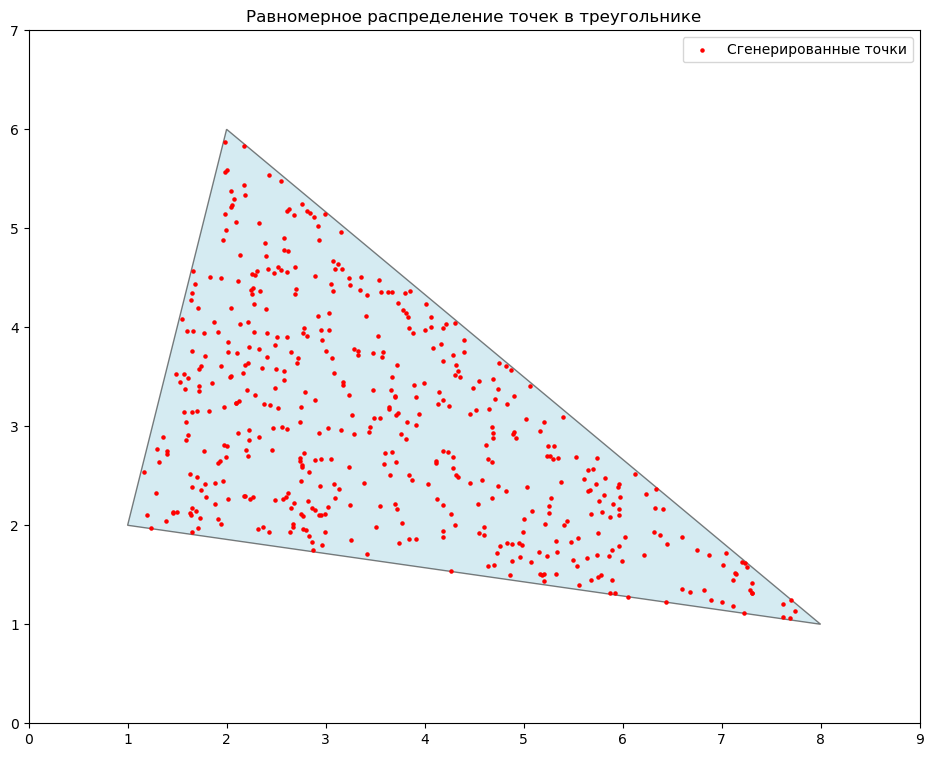

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])

N = 500

u = np.random.uniform(0, 1, N)
v = np.random.uniform(0, 1, N)

swap = u + v > 1
u[swap] = 1 - u[swap] # Прикольная штука
v[swap] = 1 - v[swap]

points = (1 - u - v)[:, np.newaxis] * A + u[:, np.newaxis] * B + v[:, np.newaxis] * C

fig, ax = plt.subplots(figsize=(16,9))

triangle = Polygon([A, B, C], closed=True, edgecolor='black', facecolor='lightblue', alpha=0.5)
ax.add_patch(triangle)

ax.scatter(points[:, 0], points[:, 1], color='red', s=5, label="Сгенерированные точки")

ax.set_xlim(min(A[0], B[0], C[0]) - 1, max(A[0], B[0], C[0]) + 1)
ax.set_ylim(min(A[1], B[1], C[1]) - 1, max(A[1], B[1], C[1]) + 1)
ax.set_aspect('equal')
ax.legend()
plt.title("Равномерное распределение точек в треугольнике")
plt.show()

# Problem 8 

## Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

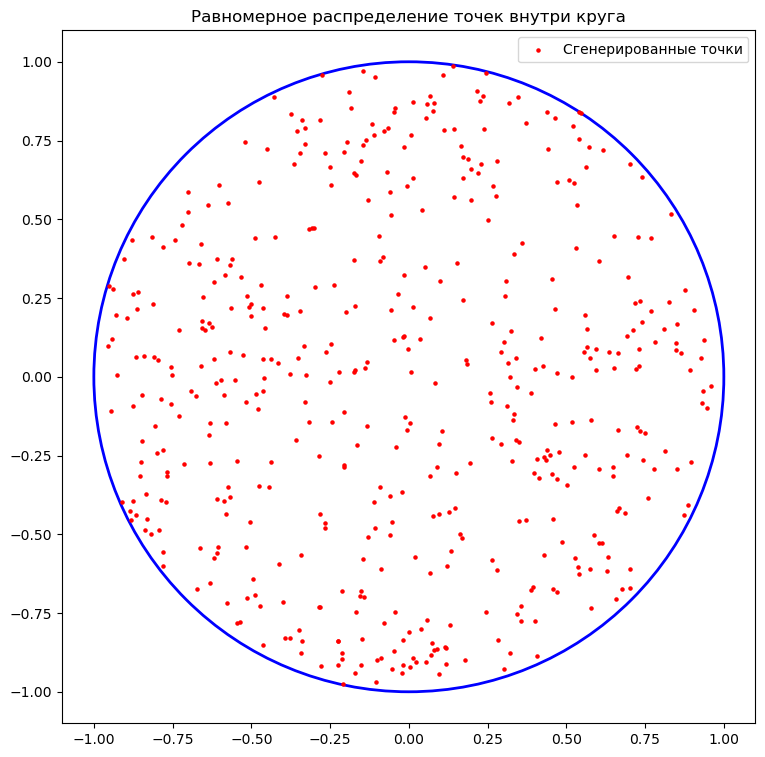

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 500

theta = np.random.uniform(0, 2 * np.pi, N)  
r = np.sqrt(np.random.uniform(0, 1, N))   

x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(figsize = (16, 9))

circle = plt.Circle((0, 0), 1, color = 'blue', fill = False, linewidth = 2)
ax.add_patch(circle)

ax.scatter(x, y, color='red', s = 5, label = "Сгенерированные точки")

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.legend(loc = "best")
plt.title("Равномерное распределение точек внутри круга")
plt.show()